In [1]:
from rel import *
from augment import *
from boundaries import *

from scipy.spatial import ConvexHull

import plotly.graph_objects as go



In [2]:
r = REL(square_tri_graph())
r.augment()

ic| cut_vertices: [5, 1]


In [3]:
node_degrees = list(r.G.degree(list(r.G.nodes)))

ic| 'planar'


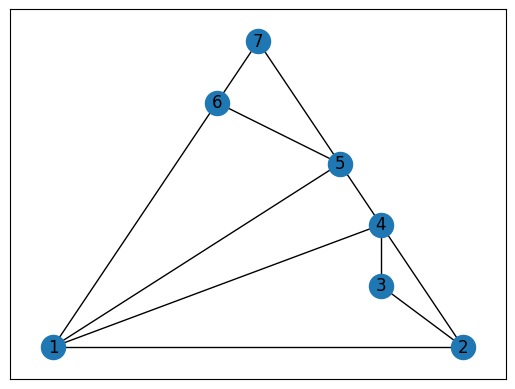

In [4]:
plot_just_planar(r.G)

In [21]:
b = Boundaries(r.G)
locs, b_nodes = b.find_boundary_points()
locs, b_nodes

(array([[-1.        , -0.35714286],
        [ 0.66666667, -0.35714286],
        [-0.16666667,  0.47619048],
        [-0.33333333,  0.30952381],
        [ 0.33333333, -0.02380952],
        [ 0.16666667,  0.14285714]]),
 [1, 2, 7, 6, 4, 5])

### non-fx way to find edges

In [22]:
potential_b_edge = []
for pair in r.G.edges:
        if pair[0] in b_nodes and pair[1] in b_nodes:
                potential_b_edge.append(pair)
                # check which are collinear
print(potential_b_edge)

[(1, 2), (1, 4), (1, 5), (1, 6), (2, 4), (4, 5), (5, 6), (5, 7), (6, 7)]


In [15]:
b.hull_lines

[(-0.0, -0.3571428571428571),
 (0.9999999999999999, 0.6428571428571428),
 (-1.0, 0.30952380952380953)]

In [24]:
true_b_edge = []
for pair in potential_b_edge: # todo merge w above 
    slope, y_intercept = find_line_through_points((b.embed[pair[0]], b.embed[pair[1]]))
    for hull_line in b.hull_lines:
        # check if slopes match 
        if check_parallel(hull_line[0], slope):
            true_b_edge.append(pair)
            break
print(true_b_edge)
    

[(1, 2), (1, 6), (2, 4), (4, 5), (5, 7), (6, 7)]


In [25]:
# the difference between potential and true => short cuts
set(potential_b_edge) - set(true_b_edge)

{(1, 4), (1, 5), (5, 6)}

(0.0, -0.3571428571428571)

In [7]:
b.hull_lines

[(-0.0, -0.3571428571428571),
 (0.9999999999999999, 0.6428571428571428),
 (-1.0, 0.30952380952380953)]

### non-fx way to find boundary 

In [8]:
embed = nx.planar_layout(r.G)
embed

{1: array([-1.        , -0.35714286]),
 2: array([ 0.66666667, -0.35714286]),
 3: array([ 0.33333333, -0.19047619]),
 4: array([ 0.33333333, -0.02380952]),
 5: array([0.16666667, 0.14285714]),
 6: array([-0.33333333,  0.30952381]),
 7: array([-0.16666667,  0.47619048])}

In [9]:
embed_arr = np.array([embed[key] for key in sorted(embed.keys())])

print(embed_arr)
print("Final shape:", embed_arr.shape)

[[-1.         -0.35714286]
 [ 0.66666667 -0.35714286]
 [ 0.33333333 -0.19047619]
 [ 0.33333333 -0.02380952]
 [ 0.16666667  0.14285714]
 [-0.33333333  0.30952381]
 [-0.16666667  0.47619048]]
Final shape: (7, 2)


In [10]:
hull = ConvexHull(embed_arr)
hull.simplices

array([[1, 0],
       [6, 0],
       [6, 1]], dtype=int32)

In [11]:
fig = go.Figure()
# plt.plot(embed_arr[:,0],embed_arr[:,1], 'o')


for simplex in hull.simplices:
    fig.add_trace(go.Scatter(x=embed_arr[simplex, 0], y=embed_arr[simplex, 1], mode='lines+markers',))
    # plt.plot(embed_arr[simplex, 0],embed_arr[simplex, 1], 'k-')

fig.add_trace(go.Scatter(x=embed_arr[:,0], y=embed_arr[:,1], mode='markers', marker_symbol="x")) 

fig.show()